In [4]:
!pip uninstall -y sympy lcapy

Found existing installation: sympy 1.7.1
Uninstalling sympy-1.7.1:
  Successfully uninstalled sympy-1.7.1


In [5]:
!pip install folium==0.2.1
!pip install sympy==1.7.1 lcapy
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
import sympy as sym
# !pip install latex
!pip3 install lcapy

# !pip install folium v==0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79813 sha256=89006690902bb2b4646ae285bd1e9b59402530b8df4db581e4ea854022851ca3
  Stored in directory: /root/.cache/pip/wheels/24/be/74/8b4e42555090b2aad019a42e9d354060820e2fffb8c48e44a7
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.12.1.post1
    Uninstalling folium-0.12.1.post1:
      Successfully uninstalled folium-0.12.1.post1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.17.5 requires folium>=0.9.1, but you have folium 0.2.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████████████

In [6]:
import pdflatex
import lcapy
lcapy.show_version()
print('Succesfuly imported lcapy: ✅')

Python: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
SymPy: 1.7.1
NumPy: 1.21.6
Matplotlib: 3.2.2
SciPy: 1.7.3
Lcapy: 1.4
Succesfuly imported lcapy: ✅


In [7]:
import pdflatex
from lcapy import R, C, L

In [8]:
lcapy.latex

<function lcapy.printing.latex(expr, fold_frac_powers=False, fold_func_brackets=False, fold_short_frac=None, inv_trig_style='abbreviated', itex=False, ln_notation=False, long_frac_ratio=None, mat_delim='[', mat_str=None, mode='plain', mul_symbol=None, order=None, symbol_names=None)>

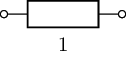

In [9]:
# ((R(1) + L(2)) | C(3)).s_model().draw()
((R(1)).s_model().draw())

In [10]:
### IMPORTAMOS LAS LIBRERIAS NECESARIAS 

############# LIBRERIAS DE REDES #####################################################################################################

import tensorflow as tf 
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization ### IMPORTAMOS LA CAPA DENSA Y DROPOUT PARA EVITAR EL OVERFITTING
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping ## IMPORTAMOS LOS CALLBACKS PARA OBTENER LOS MEJORES 
## RENDIMIENTOS DE APRENDIZAJE Y NO DESGASTAR EL SISTEMA.
from tensorflow.keras import models,optimizers,regularizers ## IMPORTAMOS LOS OPTIMIZADORES Y REGULARIZERS PARA EVITAR
## EL OVERFITTING.
from tensorflow.keras.models import Sequential ## PARA LAS CAPAS DENSAS.

######################################################################################################################################


######################LIBRERIAS PARA MANEJAR LA INFORMACIÓN ############################################################################

import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import lti 
from scipy import stats
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq, fftshift
import seaborn as sns ## LIBRERIA PARA HISTOGRAMA 
from numpy import logspace
import sympy as sym

###########################################################################################################################


###### LIBRERIAS DEL SISTEMA SLIT ##########################################################################################

!pip install lcapy
from lcapy import Circuit, j, omega, s

############################################################################################################################

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
### LIBRERIA PARA MANEJO DE DATOS #################
from sklearn.model_selection import train_test_split

In [12]:
#####################FUNCIONES FOURIER#########################################################
import matplotlib as mpl
import matplotlib.pyplot as plt


def show(signal1:np.array, signal2:np.array, N=None):
    """
    FUNCIÓN ENCARGADA DE PLOTEAR LA RECONSTRUCCIÓN
    ------------------------------------------------
    Signal1
    """

    plt.figure(figsize=(10, 5), dpi=90)

    plt.plot(t, signal1, '--', label='Square signal')
    plt.plot(t, signal2, label=f'Fourier series (N={N})')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)


def Fourier_Series(signal:np.array,t:np.array,N:int,Plot:bool=True):
    """
    FUNCION QUE SE ENCARGA DE CALCULAR LA RECONSTRUCCIÓN POR SERIES DE FOURIER
    --------------------------------------------------------------------------
    Parameters
    --------------------------------------------------------------------------

    Signal{np.array}: SEÑAL A RECONSTRUIR
    t{np.array}: ARREGLO DE TIEMPO
    N{int}: NUMERO DE ARMONICOS
    Plot{bool}: Define si se desea plotear la reconstrucción directamente en 
    la función.

    Returns
    --------------------------------------------------------------------------
    F_Series{np.array}: Devuelve la reconstrucción

    """
    T = t[-1] - t[0]
    a0 = (2/T) * np.trapz(signal, t)
    an = lambda n:(2/T) * np.trapz(signal*np.cos(2*n*np.pi*t/T), t)
    bn = lambda n:(2/T) * np.trapz(signal*np.sin(2*n*np.pi*t/T), t)
    p = []
    for n in range(1, N+1):
        p.append(an(n)*np.cos(2*n*np.pi*t/T) + bn(n)*np.sin(2*n*np.pi*t/T))
    p = np.array(p)
    signal_ = p.sum(axis=0)

    if(Plot):
        show(signal, signal_, N=N)
    return signal_
## TRANSFORMADA DE FOURIER

def Fourier_Transform(Signal:np.array,t:np.array,Plot="simple",xlim:list=[-10,10],Title=None):
    """
    FUNCIÓN ENCARGADA DE CALCULAR Y GRAFICAR LA TRANSFORMADA DE FOURIER PARA UNA SEÑAL X(t)
    --------------------------------------------------------------------------------------
    Parameters
    --------------------------------------------------------------------------------------
    Signal{np.array}: Arreglo con la señal x(t)
    t{np.array}: Vector de tiempo
    Plot{Str}: Variable para determinar el tipo de ploteo a realizar, para el cual se manejan
    3 valores
        -Plot==simple[Default]: me grafica la transformada con sus valores Reales.
        -Plot==Imag_Real: Me grafica la transformada tanto la parte real como la imaginaria.
        -Plot==Complete: Me grafica la magnitud, parte real, parte imaginaria y fase.
   xlim{list:2 Elementos}=DEFINE LOS LIMITES DEL PLOTEO EN X. 


    Returns
    --------------------------------------------------------------------------------------
     ft{np.array}: Transformada de fourier  de Signal
     w{np.array}: Vector de frecuencias asociado.
    """
    ft = fftshift(fft(Signal)) ## REALIZAMOS LA TRANSFORMADA DEL SISTEMA
    w = fftshift(fftfreq(ft.shape[0],t[1]-t[0])) ## GENERAMOS MI VECTOR DE FRECUENCIA
    
    if(Plot=="simple"):
        plt.figure(figsize=(14,6))
        plt.plot(w,ft)
        plt.fill_between(w,ft,alpha=0.5)
        plt.title('Frequency Representation {}'.format(Title))
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.xlim(xlim[0],xlim[1])
    elif(Plot=="Imag_Real"):
        plt.figure(figsize=(12,6))
        plt.subplot(211)
        plt.title('Real Component {}'.format(Title))
        plt.plot(w,ft.real)
        plt.grid()
        plt.xlim(xlim[0],xlim[1])
        plt.subplot(212)
        plt.plot(w,ft.imag)
        plt.title('Imaginary Component {}'.format(Title))
        plt.grid()
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')
        plt.xlim(xlim[0],xlim[1])
    elif(Plot=="Complete"):
        mag = np.sqrt((ft.real**2)+(ft.imag**2)) ### SACAMOS LA MAGNITUD DE LA TRANSFORMADA 
        phase = np.arctan(ft.imag/ft.real) ### CALCULAMOS LA FASE 

        plt.figure(figsize=(14,12))
        plt.subplot(311)
        plt.title('Magnitude')
        plt.plot(w, mag)
        plt.grid()
        plt.xlim(-10,10)
        plt.subplot(312)
        plt.plot(w,ft)
        plt.title('FT {}'.format(Title))
        plt.grid()
        plt.xlim(xlim[0],xlim[1])
        plt.subplot(313)
        plt.plot(w,phase,'-',color='orange')
        plt.stem(w,phase)
        #plt.semilogy()
        plt.title('Phase')
        plt.grid()
        plt.xlabel('Frequency [Hz]')
        plt.xlim(xlim[0],xlim[1])
    else:
        print("=========================================")
        print("      TIPO DE PLOTEO NO ADMITIDO")
        print("=========================================")
     
    

    return ft,w

## GENERAMOS LA ENTRADA DE NUESTRO CIRCUITO

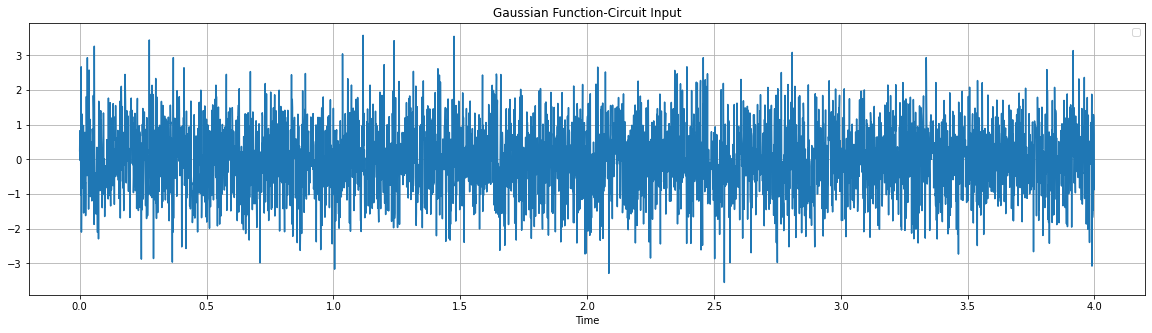

<Figure size 1440x360 with 0 Axes>

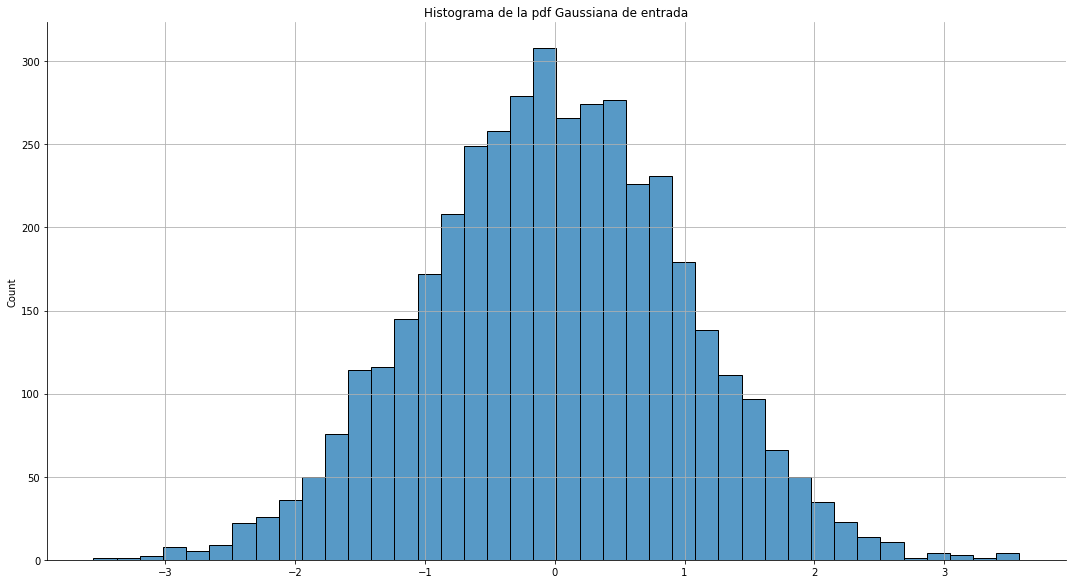

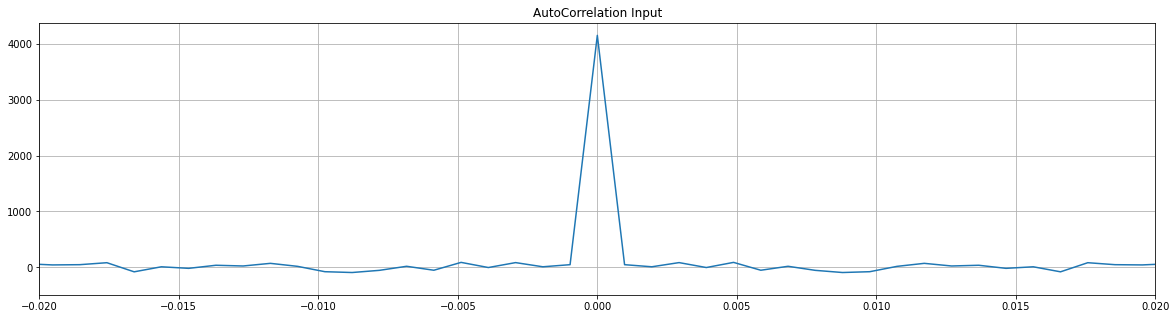

In [13]:
## GENERAMOS LA ENTRADA DE NUESTRO CIRCUITO:

Nsample = 4096
Nstep=(Nsample/32)
Nbins=int((1+3.322*np.log2(Nsample)))### NUMERO DE BINS PARA EL HISTOGRAMA


Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0, 4, Tdisc) ## GENERAMOS VECTOR DE TIEMPO PARA NUESTRA FUNCIÓN ALEATORIA


### GENERAMOS UN RUIDO GAUSSIANO
sd=1
mean=0
Gaussian=np.random.normal(mean,sd,len(t)) 



Autocorrelacion_Gaussian=np.correlate(Gaussian,Gaussian,mode="same") ## GENERAMOS LA AUTOCORRELACION

plt.figure(figsize=(20,5))
plt.plot(t,Gaussian)
plt.title("Gaussian Function-Circuit Input")
plt.xlabel("Time")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
sns.displot(Gaussian,bins=Nbins,height=8, aspect=15/8)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Gaussiana de entrada")
plt.grid()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(t-2,Autocorrelacion_Gaussian)
plt.xlim(-0.02,0.02)
hist_kws={"edgecolor":"balck"}
plt.title("AutoCorrelation Input")
plt.grid()
plt.show()

In [14]:
fourier_transform = np.fft.rfft(Gaussian)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, 60/2, len(power_spectrum))

# Filtro pasa altas

In [15]:
########### CONTRUIMOS EL CIRCUITO##########################:

ctt1=Circuit("""
Vi 1 0 step;down
R1 1 2; right, size=1.5
C1 2 3; right, size=1.5
L1 3 0; down, size=1.5
; autoground=true"""
)

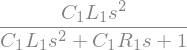

In [16]:
##GENERAMOS LA FUNCIÓN DE TRANSFERENCIA DEL CIRCUITO TOMANDO LA SALIDA EN R2
H2=(ctt1.L1.V(s)/ctt1.Vi.V(s)).simplify()
H2

In [17]:
#Dando valores al circuito:
C1=26e-4
R1=2
L1=10e-4
Coeficientes_num2=[C1*L1,0,0] #Coeficientes numerador
Coeficientes_dem2=[C1*L1,C1*R1,1] #Coeficientes denominador

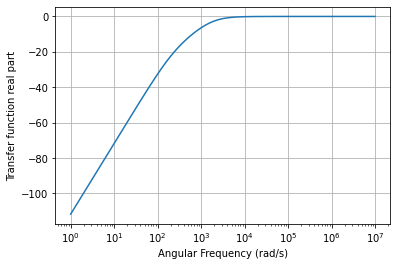

In [18]:
W=logspace(0,7,2000)
H2_valores=H2.subs("R1",R1).subs("C1",C1).subs("L1",L1)
X=H2_valores(j*omega).dB.plot(W,log_frequency=True)

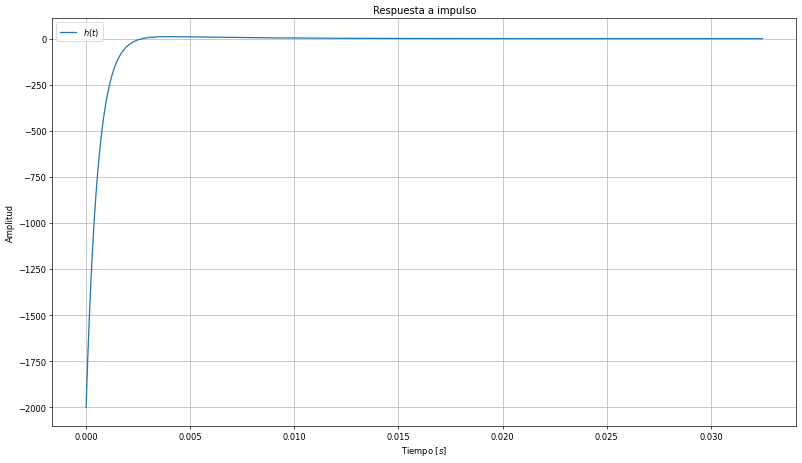

In [19]:
## AHORA ANALIZANDO LA RESPUESTA AL IMPULSO DEL SISTEMA, Y ASIGNANDO LOS VALORES AL MODELADO DEL CIRCUITO:
##OBSERVAMOS LA RESPUESTA AL IMPULSO:

lti_system2 = lti(Coeficientes_num2, Coeficientes_dem2)   #LTI
t2, h2 = lti_system2.impulse(N=Nsample) # sistema LTI exitado con la función impulso
## NOS DEVUELVE 

plt.figure(figsize=(16, 9), dpi=60)
plt.plot(t2, h2, label='$h(t)$')

plt.grid(True)
plt.legend()
plt.title("Respuesta a impulso")
plt.xlabel("Tiempo [$s$]")
plt.ylabel("Amplitud")
plt.show()

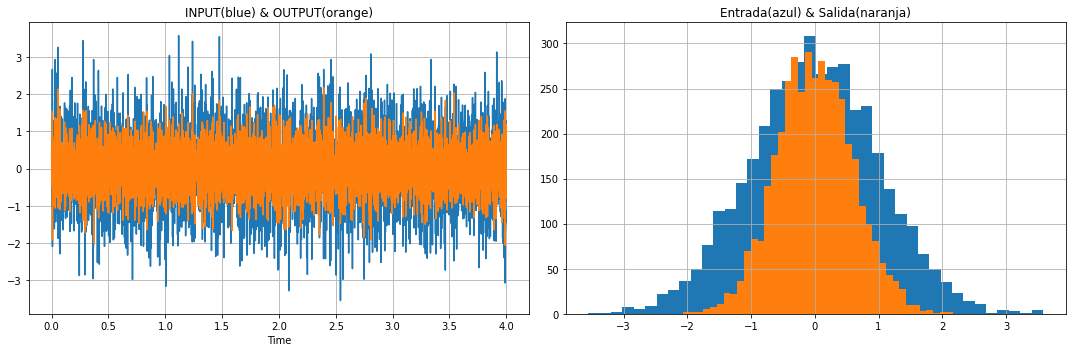

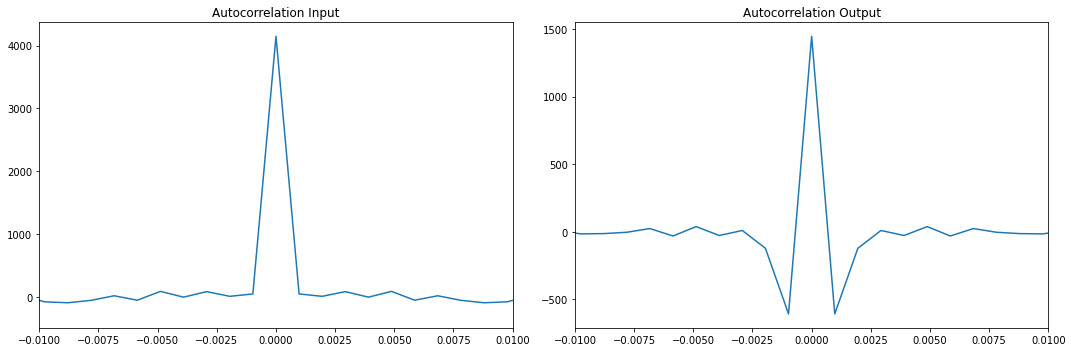

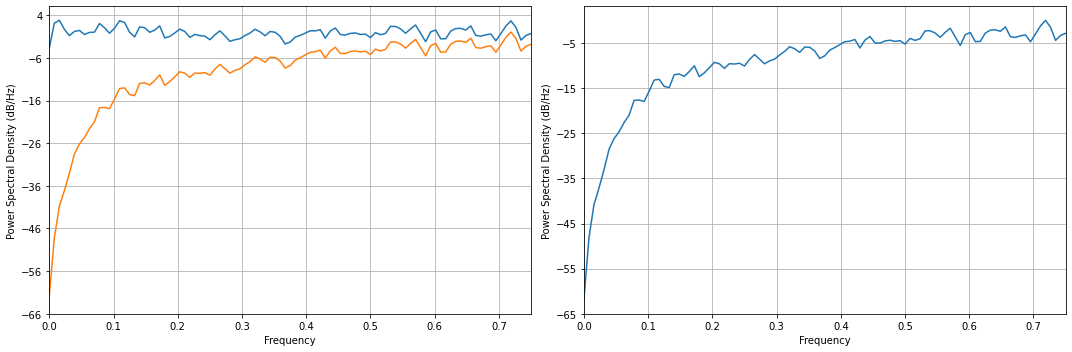

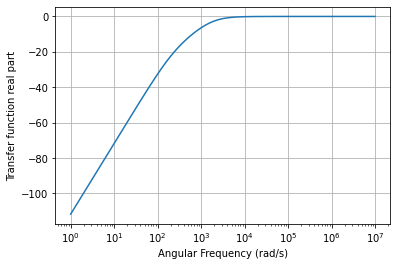

In [20]:
## INGRESAMOS LA ENTRADA EXPONENCIAL A NUESTRO CIRCUITO:
_,Output_Circuit2,_=lti_system2.output(Gaussian, t) ##SALIDA DEL CIRCUITO.
Autocorrelacion_Output2=np.correlate(Output_Circuit2,Output_Circuit2,mode="same") ## GENERAMOS LA AUTOCORRELACION
# COMPARAMOS ENTRADA VS SALIDA 

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(t, Gaussian)
axs[0].set_title("INPUT(blue) & OUTPUT(orange)")
axs[0].set_xlabel("Time")
axs[0].plot(t, Output_Circuit2)

axs[0].grid()

axs[1].hist(Gaussian,bins=Nbins)


axs[1].hist(Output_Circuit2,bins=Nbins)

axs[1].set_title("Entrada(azul) & Salida(naranja)")
axs[1].grid()

fig.tight_layout()
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(t-2,Autocorrelacion_Gaussian)

axs[0].set_title("Autocorrelation Input")
axs[0].set_xlim(-0.01,0.01)
#axs[0].set_ylim(-100,1000)
#axs[1].plot(t2, h2, label='$h(t)$')
#axs[1].set_title("Impulso")
axs[1].plot(t-2, Autocorrelacion_Output2)
axs[1].set_xlim(-0.01,0.01)
axs[1].set_title("Autocorrelation Output")
#axs[1].set_xlim(-0.01,0.01)
#axs[2].set_ylim(-30,30)


fig.tight_layout()

fig, axs = plt.subplots(1, 2, figsize=(15,5))

#POWER SPECTRUM
axs[0].psd(Gaussian)
axs[0].set_xlim(0,.75)
axs[0].psd(Output_Circuit2)
axs[1].psd(Output_Circuit2)
axs[1].set_xlim(0,.75)
#axs[1].semilogx()
X=H2_valores(j*omega).dB.plot(W,log_frequency=True)




fourier_transform2 = np.fft.rfft(Output_Circuit2)

abs_fourier_transform2 = np.abs(fourier_transform2)

power_spectrum2 = np.square(abs_fourier_transform2)

frequency2 = np.linspace(0, 60/2, len(power_spectrum2))



#axs[2].plot(frequency, power_spectrum)
#axs[2].plot(frequency2, power_spectrum2)
#axs[2].set_xlim(0.15,30)
fig.tight_layout()

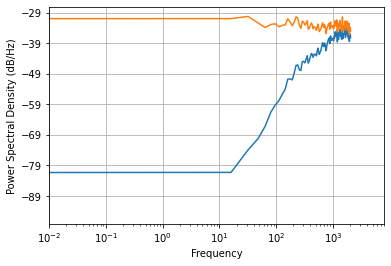

In [21]:
plt.psd(Output_Circuit2, Fs=Nsample)
plt.psd(Gaussian, Fs=Nsample)
plt.xlim(0.01,8000)
plt.semilogx()


# GENERAMOS NUESTRO MODELO DE RED 

In [22]:
### IMPORTAMOS LA LIBRERIA Sk-learn ## PARA MANEJO DE DATOS DE TESTEO.

X_train, X_test, y_train, y_test = train_test_split(Gaussian, Output_Circuit2)

In [23]:
### OBSERVEMOS EL TAMAÑO DE LOS DATOS DE TESTEO
print(X_train.shape)
print(X_test.shape)

(3072,)
(1024,)


In [80]:
## POR BUENAS PRACTICAS VAMOS A GENERAR UN SET DE VALIDACIÓN PARA COMPROBAR OVERFITTING
## APARTIR DEL SET DE VALIDACIÓN

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,train_size=0.4)


print(X_train.shape)
print(X_val.shape)

(147, 1)
(221, 1)


In [81]:
### NORMALIZAMOS LOS DATOS PARA TENER UNA MISMA DISTRIBUCIÓN PARA TODOS.
mean=X_train.mean(axis=0)
X_train=X_train-mean
std=X_train.std(axis=0)
X_train=X_train/(std**2)

#print(X_train.shape)

## HACEMOS LO MISMO CON LOS DATOS DE TESTEO Y VAL
## PERO TENIENDO EN CUENTA LA MEDIA Y VARIANZA DE LOS DATOS DE TRAIN PUESTO QUE LOS DE TEST Y VAL EN TEORIA NO LOS TENGO.


X_test=X_test-mean
X_test=X_test/(std**2)

X_val=X_val-mean
X_val=X_val/(std**2)


In [82]:
### ORGANIZAMOS LOS DATOS DE TESTEO 
X_train=X_train.reshape(len(X_train),1).astype("float32") ### LO GENERAMOS COMO UN TENSOR PARA QUE SEA MAS FACIL RECONOCERLO.
X_test=X_test.reshape(len(X_test),1).astype("float32")
X_val=X_val.reshape(len(X_val),1).astype("float32")

y_train=y_train.reshape(len(y_train),1).astype("float32")
y_test=y_test.reshape(len(y_test),1).astype("float32")
y_val=y_val.reshape(len(y_val),1).astype("float32")

print(X_train.shape)
print(y_train.shape)

(147, 1)
(147, 1)


In [83]:
#Asumamos una red multicapa secuencial como la de la figura anterior de tres capas ( layers ),
#con un vector de entrada, después de dense número de neuronas, nodos. 
##### GENERAMOS EL MODELO
modelo=models.Sequential()
#### CARGAMOS LAS CAPAS

modelo.add(Dense((Nstep+1),activation="relu",input_shape=(1,1))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION

modelo.add(Dense(Nstep,activation="relu")) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dropout(0.8)) #Dilución es una técnica de regularización para reducir el sobreajuste en redes neuronales artificiales
modelo.add(Dense(Nstep,activation="relu",kernel_regularizer=regularizers.l1(0.001))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION 3 capas ocultas
modelo.add(Dense(Nstep,activation="relu",kernel_regularizer=regularizers.l2(0.001)))
modelo.add(Dense(1)) ## COMO ES LINEAL LA SALIDA NO NECESITO PONERLE UNA CAPA DE ACTIVACIÓN
model.compile(optimizer=adam, loss= "msi") #Los function
model.compile(loss="mean_squared_error", optimizer=RMSprop(learning_rate=0.01))




In [84]:
### OBSERVAMOS EL MODELO

modelo.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 1, 129)            258       
                                                                 
 dense_74 (Dense)            (None, 1, 128)            16640     
                                                                 
 dropout_14 (Dropout)        (None, 1, 128)            0         
                                                                 
 dense_75 (Dense)            (None, 1, 128)            16512     
                                                                 
 dense_76 (Dense)            (None, 1, 128)            16512     
                                                                 
 dense_77 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 50,051
Trainable params: 50,051
Non-tra

In [85]:
### ANTES DE COMPILAR GENERAMOS EL CALLBACK.
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [86]:
#### COMPILAMOS EL MODELO 
modelo.compile(optimizer=optimizers.RMSprop(lr=0.01),loss="mae")

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [87]:
### GENERAMOS EL ENTRENAMIENTO 

history=modelo.fit(X_train,
         y_train,
         batch_size=3
         ,validation_data=(X_val,y_val),
         callbacks=[early],
         epochs=10)

Epoch 1/10
49/49 [==============================] - 1s 11ms/step - loss: 0.8634 - val_loss: 0.5712
Epoch 2/10
49/49 [==============================] - 0s 5ms/step - loss: 0.5698 - val_loss: 0.4987
Epoch 3/10
49/49 [==============================] - 0s 5ms/step - loss: 0.5074 - val_loss: 0.4945
Epoch 4/10
49/49 [==============================] - 0s 6ms/step - loss: 0.5106 - val_loss: 0.5004
Epoch 5/10
49/49 [==============================] - 0s 5ms/step - loss: 0.5192 - val_loss: 0.4788
Epoch 6/10
49/49 [==============================] - 0s 5ms/step - loss: 0.5241 - val_loss: 0.4981
Epoch 7/10
49/49 [==============================] - 0s 6ms/step - loss: 0.5555 - val_loss: 0.5062
Epoch 8/10
49/49 [==============================] - 0s 5ms/step - loss: 0.5144 - val_loss: 0.4797


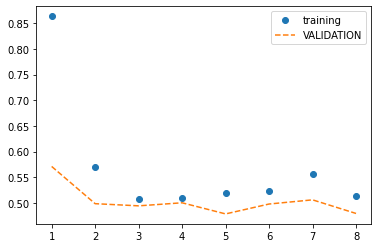

In [88]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")
plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

In [91]:
## ANALICEMOS CON ÉL LOS DATOS DE TESTEO.

modelo.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.4977


In [90]:
Y_PREDICHO=np.array(modelo.predict(X_train))
print(X_train.shape)
Y_PREDICHO=Y_PREDICHO.reshape(2304,1)
plt.plot(y_train)
plt.plot(Y_PREDICHO)

5/5 [==============================] - 0s 3ms/step
(147, 1)


ValueError: ignored

In [ ]:
plt.figure(figsize=(10,10))
plt.title("SALIDA CIRCUITO")
plt.plot(Y_PREDICHO)
plt.plot(y_test)
#plt.xlim(3,t[len(t)-1])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b8cd8a89-1955-4708-8e62-136598b5b723' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>